In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funcs_vis as fn_vis
import funcs_prep as fn_prep
import funcs_ml as fn_ml
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_eclipse = pd.read_csv('data/eclipse_bug_report_data.csv')

In [3]:
df_eclipse.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,label
0,RECOMMENDERS-467951,2015-05-22,Core,RECOMMENDERS,LogTraceException in ProposalUtils.toMethodNam...,The following incident was reported via the au...,recommenders-inbox,error-reports-inbox,fixed,1,closed,6,2015-05-27,0,2,2015-05-27,5,normal,2,Functional
1,QVTO-463396,2015-03-29,Engine,QVTO,CCE in DecorationNodeImpl.eSet (159),CCE in DecorationNodeImpl.eSet (159),serg.boyko2011,error-reports-inbox,fixed,1,resolved,4,2015-04-01,0,8,2015-03-31,2,normal,2,Functional
2,EQUINOX-530069,2018-01-20,Compendium,EQUINOX,[http servlet] During dispatching javax.servle...,Original issue https://issues.liferay.com/brow...,raymond.auge,raymond.auge,fixed,1,resolved,4,2018-01-22,0,3,2018-01-22,2,normal,2,Infrastructure
3,NATTABLE-422482,2013-11-25,Core,NATTABLE,Left border of NatTable is not drawn,Rendering a NatTable on a Composite with margi...,dirk.fauth,dirk.fauth,fixed,1,closed,6,2014-07-23,0,3,2013-11-25,0,normal,2,Usability
4,WTP_JAVA_EE_TOOLS-116294,2005-11-14,jst.j2ee,WTP_JAVA_EE_TOOLS,NPE while importing EAR with utility jar,Import and EAR which has EJb and Ejb client tr...,jsholl,nagrawal,fixed,1,closed,6,2005-12-09,0,4,2005-11-15,1,blocker,6,Functional


In [4]:
df_eclipse.shape

(9610, 20)

In [5]:
df_eclipse.count()

bug_id                  9610
creation_date           9610
component_name          9610
product_name            9610
short_description       9610
long_description        9541
assignee_name           9610
reporter_name           9610
resolution_category     9610
resolution_code         9610
status_category         9610
status_code             9610
update_date             9610
quantity_of_votes       9610
quantity_of_comments    9610
resolution_date         9610
bug_fix_time            9610
severity_category       9610
severity_code           9610
label                    301
dtype: int64

In [6]:
df_eclipse = df_eclipse.dropna()

In [7]:
df_eclipse.count()

bug_id                  300
creation_date           300
component_name          300
product_name            300
short_description       300
long_description        300
assignee_name           300
reporter_name           300
resolution_category     300
resolution_code         300
status_category         300
status_code             300
update_date             300
quantity_of_votes       300
quantity_of_comments    300
resolution_date         300
bug_fix_time            300
severity_category       300
severity_code           300
label                   300
dtype: int64

In [8]:
df_mozilla = pd.read_csv('data/mozilla_bug_report_data.csv')

In [9]:
df_mozilla.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,label
0,BUGZILLA-294734,2005-05-18,Bugzilla-General,BUGZILLA,Emergency 2.16.10 Release,2.16.9 is broken -- many users can't enter bug...,mkanat,mkanat,fixed,1,resolved,4,2005-05-19,0,15,2005-05-19,1,blocker,6,Regression
1,OTHER_APPLICATIONS-363323,2006-12-09,DOM Inspector,OTHER_APPLICATIONS,DOM View is really inefficient with setting wh...,From comment in url:\n\nCurrent code:\nmenuite...,sdwilsh,sdwilsh,fixed,1,resolved,4,2011-06-01,0,8,2007-01-14,36,normal,2,Performance
2,SUPPORT.MOZILLA.ORG-398246,2007-10-02,General,SUPPORT.MOZILLA.ORG,Add support for custom cookies and cache headers,Adding support for custom headers and cookie n...,morgamic,morgamic,fixed,1,resolved,4,2009-11-02,0,23,2008-03-24,174,blocker,6,Functional
3,OTHER_APPLICATIONS-318859,2005-12-02,ChatZilla,OTHER_APPLICATIONS,DCC functionality in ChatZilla isn't functional.,User-Agent: Mozilla/5.0 (Macintosh U PPC...,gijskruitbosch+bugs,dafydd,fixed,1,resolved,4,2006-02-10,0,14,2005-12-07,5,normal,2,Functional
4,DEVELOPER.MOZILLA.ORG-416840,2008-02-11,General,DEVELOPER.MOZILLA.ORG,Fix and cruft,Since we removed the breadcrumbs and title-ove...,nobody,jorendorff,fixed,1,resolved,4,2012-09-18,0,4,2008-02-12,1,normal,2,Regression


In [10]:
df_mozilla.shape

(9956, 20)

In [11]:
df_mozilla.count()

bug_id                  9956
creation_date           9956
component_name          9956
product_name            9956
short_description       9955
long_description        9878
assignee_name           9956
reporter_name           9956
resolution_category     9956
resolution_code         9956
status_category         9956
status_code             9956
update_date             9956
quantity_of_votes       9956
quantity_of_comments    9956
resolution_date         9956
bug_fix_time            9956
severity_category       9956
severity_code           9956
label                    278
dtype: int64

In [12]:
df_mozilla = df_mozilla.dropna()

In [13]:
df_mozilla.count()

bug_id                  278
creation_date           278
component_name          278
product_name            278
short_description       278
long_description        278
assignee_name           278
reporter_name           278
resolution_category     278
resolution_code         278
status_category         278
status_code             278
update_date             278
quantity_of_votes       278
quantity_of_comments    278
resolution_date         278
bug_fix_time            278
severity_category       278
severity_code           278
label                   278
dtype: int64

<h2><b>Data Visualization</b></h2>

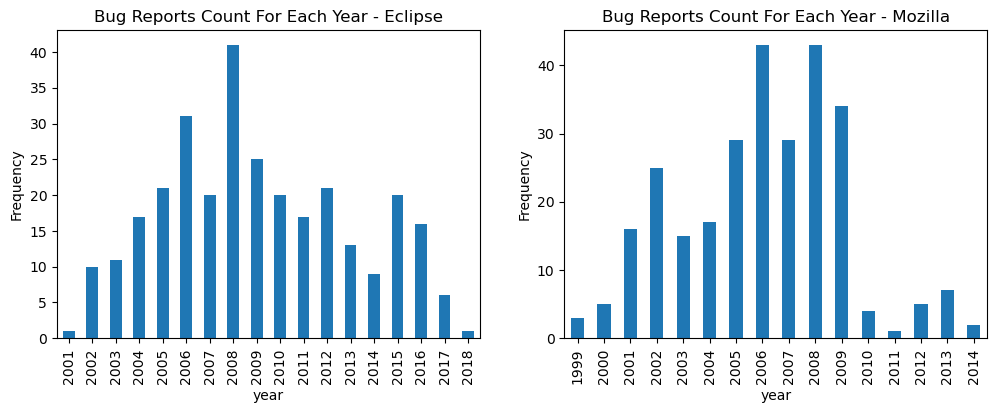

In [14]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
fn_vis.year_plot(df_eclipse, "Eclipse")

plt.subplot(1,2,2)
fn_vis.year_plot(df_mozilla, "Mozilla")

plt.show()

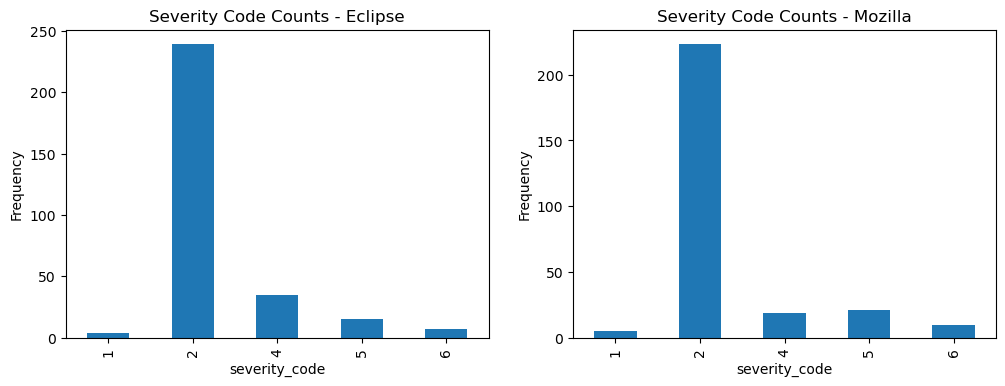

In [15]:
df_eclipse['severity_code'] = df_eclipse['severity_code'].astype(int)

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
fn_vis.severity_plot(df_eclipse, "Eclipse")

plt.subplot(1,2,2)
fn_vis.severity_plot(df_mozilla, "Mozilla")
plt.show()

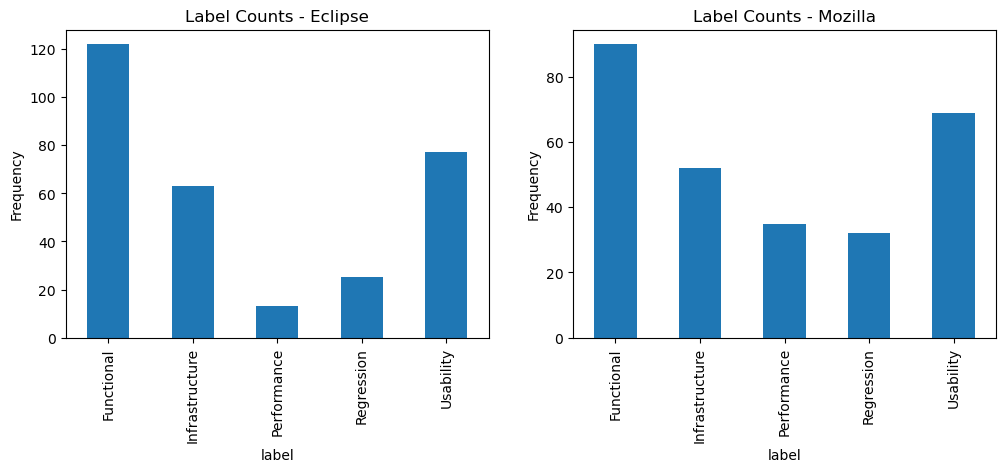

In [16]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
fn_vis.label_plot(df_eclipse, "Eclipse")

plt.subplot(1,2,2)
fn_vis.label_plot(df_mozilla, "Mozilla")
plt.show()

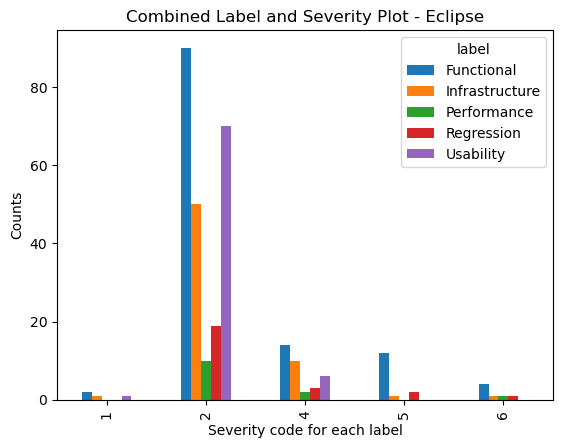

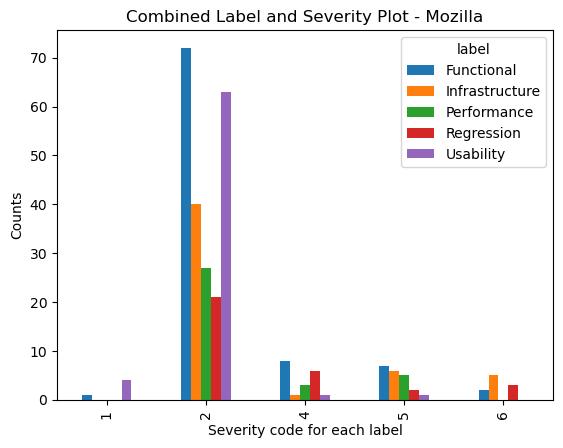

In [17]:
fn_vis.label_sev_plot(df_eclipse, "Eclipse")
fn_vis.label_sev_plot(df_mozilla, "Mozilla")

<h2><b>Data Preparation</b></h2>

In [18]:
df_eclipse = df_eclipse.drop(columns=['creation_date','assignee_name','reporter_name','resolution_category',
                              'resolution_code','status_category','status_code','update_date',
                             'quantity_of_votes','quantity_of_comments','resolution_date',
                             'severity_category'])

df_mozilla = df_mozilla.drop(columns=['creation_date','assignee_name','reporter_name','resolution_category',
                              'resolution_code','status_category','status_code','update_date',
                             'quantity_of_votes','quantity_of_comments','resolution_date',
                             'severity_category'])

In [19]:
eclipse_enc = pd.get_dummies(df_eclipse, columns=['label'])
eclipse_enc.head()

,bug_id,component_name,product_name,short_description,long_description,bug_fix_time,severity_code,label_Functional,label_Infrastructure,label_Performance,label_Regression,label_Usability
0,RECOMMENDERS-467951,Core,RECOMMENDERS,LogTraceException in ProposalUtils.toMethodNam...,The following incident was reported via the au...,5,2,True,False,False,False,False
1,QVTO-463396,Engine,QVTO,CCE in DecorationNodeImpl.eSet (159),CCE in DecorationNodeImpl.eSet (159),2,2,True,False,False,False,False
2,EQUINOX-530069,Compendium,EQUINOX,[http servlet] During dispatching javax.servle...,Original issue https://issues.liferay.com/brow...,2,2,False,True,False,False,False
3,NATTABLE-422482,Core,NATTABLE,Left border of NatTable is not drawn,Rendering a NatTable on a Composite with margi...,0,2,False,False,False,False,True
4,WTP_JAVA_EE_TOOLS-116294,jst.j2ee,WTP_JAVA_EE_TOOLS,NPE while importing EAR with utility jar,Import and EAR which has EJb and Ejb client tr...,1,6,True,False,False,False,False


In [20]:
mozilla_enc = pd.get_dummies(df_mozilla, columns=['label'])
mozilla_enc.head()

,bug_id,component_name,product_name,short_description,long_description,bug_fix_time,severity_code,label_Functional,label_Infrastructure,label_Performance,label_Regression,label_Usability
0,BUGZILLA-294734,Bugzilla-General,BUGZILLA,Emergency 2.16.10 Release,2.16.9 is broken -- many users can't enter bug...,1,6,False,False,False,True,False
1,OTHER_APPLICATIONS-363323,DOM Inspector,OTHER_APPLICATIONS,DOM View is really inefficient with setting wh...,From comment in url:\n\nCurrent code:\nmenuite...,36,2,False,False,True,False,False
2,SUPPORT.MOZILLA.ORG-398246,General,SUPPORT.MOZILLA.ORG,Add support for custom cookies and cache headers,Adding support for custom headers and cookie n...,174,6,True,False,False,False,False
3,OTHER_APPLICATIONS-318859,ChatZilla,OTHER_APPLICATIONS,DCC functionality in ChatZilla isn't functional.,User-Agent: Mozilla/5.0 (Macintosh U PPC...,5,2,True,False,False,False,False
4,DEVELOPER.MOZILLA.ORG-416840,General,DEVELOPER.MOZILLA.ORG,Fix and cruft,Since we removed the breadcrumbs and title-ove...,1,2,False,False,False,True,False


In [21]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [123]:
combined_df = pd.concat([eclipse_enc, mozilla_enc],axis = 0)

In [124]:
combined_df = fn_prep.combine_columns(combined_df, lemmatizer, stop_words)

In [113]:
combined_df.head()

,bug_id,component_name,product_name,short_description,long_description,bug_fix_time,severity_code,label_Functional,label_Infrastructure,label_Performance,label_Regression,label_Usability,description,product
0,RECOMMENDERS-467951,Core,RECOMMENDERS,LogTraceException in ProposalUtils.toMethodNam...,The following incident was reported via the au...,5,2,True,False,False,False,False,logtraceexception proposalutilstomethodname 89...,recommenders467951 core recommenders
1,QVTO-463396,Engine,QVTO,CCE in DecorationNodeImpl.eSet (159),CCE in DecorationNodeImpl.eSet (159),2,2,True,False,False,False,False,cce decorationnodeimpleset 159 cce decorationn...,qvto463396 engine qvto
2,EQUINOX-530069,Compendium,EQUINOX,[http servlet] During dispatching javax.servle...,Original issue https://issues.liferay.com/brow...,2,2,False,True,False,False,False,http servlet dispatching javaxservletincludeco...,equinox530069 compendium equinox
3,NATTABLE-422482,Core,NATTABLE,Left border of NatTable is not drawn,Rendering a NatTable on a Composite with margi...,0,2,False,False,False,False,True,left border nattable drawn rendering nattable ...,nattable422482 core nattable
4,WTP_JAVA_EE_TOOLS-116294,jst.j2ee,WTP_JAVA_EE_TOOLS,NPE while importing EAR with utility jar,Import and EAR which has EJb and Ejb client tr...,1,6,True,False,False,False,False,npe importing ear utility jar import ear ejb e...,wtp_java_ee_tools116294 jstj2ee wtp_java_ee_tools


In [125]:
df_vec1 = fn_prep.vectorizer(combined_df, 'description', 90)

In [27]:
df_vec2 = fn_prep.vectorizer(combined_df, 'product', 15)

In [126]:
final_df = fn_prep.processed_df(combined_df, df_vec1, df_vec2)

In [127]:
X = final_df.drop(columns=['label_Functional','label_Infrastructure','label_Performance',
                              'label_Regression','label_Usability'])
y = final_df[['label_Functional','label_Infrastructure','label_Performance',
                              'label_Regression','label_Usability']].idxmax(axis=1)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

<h2><b>Training</b></h2>

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>Logistic Regression</h3>

In [130]:
model_lg = LogisticRegression(class_weight='balanced', multi_class='multinomial',penalty='l2', solver='saga', max_iter=30000)
fn_ml.classify(model_lg, X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.51      0.40      0.45        47
           1       0.50      0.39      0.44        28
           2       0.60      0.60      0.60        10
           3       0.11      0.22      0.15         9
           4       0.52      0.68      0.59        22

    accuracy                           0.46       116
   macro avg       0.45      0.46      0.45       116
weighted avg       0.49      0.46      0.46       116



<h3>Random Forest</h3>

In [134]:
model_rf = RandomForestClassifier(n_estimators=750,class_weight='balanced', random_state=42)
fn_ml.classify(model_rf, X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.41      0.79      0.54        47
           1       0.86      0.21      0.34        28
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         9
           4       0.35      0.27      0.31        22

    accuracy                           0.42       116
   macro avg       0.32      0.25      0.24       116
weighted avg       0.44      0.42      0.36       116



C:\Users\vasav\anaconda3\envs\deepL\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vasav\anaconda3\envs\deepL\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vasav\anaconda3\envs\deepL\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
from imblearn .over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_re, Y_re = smote.fit_resample(X_train_scaled, y_train)

In [133]:
rf = RandomForestClassifier(n_estimators=1000,class_weight='balanced', random_state=42)
fn_ml.classify(rf, X_re, Y_re, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.49      0.60      0.54        47
           1       0.48      0.36      0.41        28
           2       0.25      0.10      0.14        10
           3       0.44      0.44      0.44         9
           4       0.48      0.55      0.51        22

    accuracy                           0.47       116
   macro avg       0.43      0.41      0.41       116
weighted avg       0.46      0.47      0.46       116



<h3>Support Vector Machine</h3>

In [36]:
model_svm = SVC(kernel='linear')
fn_ml.classify(model_svm, X_re, Y_re, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.50      0.49      0.49        47
           1       0.54      0.46      0.50        28
           2       0.45      0.50      0.48        10
           3       0.12      0.22      0.16         9
           4       0.42      0.36      0.39        22

    accuracy                           0.44       116
   macro avg       0.41      0.41      0.40       116
weighted avg       0.46      0.44      0.45       116

